In [33]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, log

In [34]:
class Bandit_G:
    def __init__(self, m):
        self.m = m #true mean
        self.mean = 0 #Estimate of our bandit's mean
        self.N = 0
        
    def pull(self): #simulates pulling the bandit's arm.
        return np.random.randn() + self.m #Every bandit's reward will be gaussian with unit variants
    
    def update(self, X):
        self.N += 1
        self.mean = (1-(1/self.N))*(self.mean) + (X/self.N)

In [35]:
class Bandit_O:
    def __init__(self, m, upperlimit):
        self.m = m #true mean
        self.mean = upperlimit #Estimate of our bandit's mean
        self.N = 1

    def pull(self): #simulates pulling the bandit's arm.
        return np.random.randn() + self.m #Every bandit's reward will be gaussian with unit variants
    
    def update(self, X):
        self.N += 1
        self.mean = (1-(1/self.N))*(self.mean) + (X/self.N)


In [36]:
class Bandit_U:
    def __init__(self, m):
        self.m = m #true mean
        self.mean = 0 #Estimate of our bandit's mean
        self.N = 1

    def pull(self): #simulates pulling the bandit's arm.
        return np.random.randn() + self.m #Every bandit's reward will be gaussian with unit variants
    
    def update(self, X):
        self.N += 1
        self.mean = (1-(1/self.N))*(self.mean) + (X/self.N)


In [37]:
class BayesianBandit:
    def __init__(self, m):
        self.m = m
        self.m0 = 0
        self.lambda0 = 1
        self.sum_x = 0
        self.tau = 1
        
    def pull(self):
        return np.random.randn() + self.m
    
    def sample(self):
        #Gaussian method which genetares a sample mean with mean m0 and precision lambda0.
        return np.random.randn() / np.sqrt(self.lambda0) + self.m0
    
    def update(self, x):
        self.lambda0 +=1 #number of times the bandit has been played.
        self.sum_x += x #sum of rewards got till now.
        self.m0 = self.tau*self.sum_x/self.lambda0 #(actual mean we got if assume tau =1)    

In [38]:
def run_experiment_epsilon_greedy(m1, m2, m3, N): 
    bandits = [Bandit_G(m1), Bandit_G(m2), Bandit_G(m3)]
    data = np.empty(N)
    
    for i in range(N):
        #Epsilon Greedy
    
        p = np.random.random() 
    
        if p < (1/(i+1)):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.mean)
    
    return cumulative_average

In [45]:
def run_experiment_optimistic_inital_values(m1, m2, m3, N):
    bandits = [Bandit_O(m1, 10), Bandit_O(m2, 10), Bandit_O(m3, 10)]
    data = np.empty(N)
    
    for i in range(N):
        #Epsilon Greedy
    
        p = np.random.random() 
    
        j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.mean)
    
    return cumulative_average

In [46]:
def run_experiment_ucb1(m1, m2, m3, eps, N):
    bandits = [Bandit_U(m1), Bandit_U(m2), Bandit_U(m3)]
    data = np.empty(N)
    
    for i in range(1, N):
        #Epsilon Greedy
    
        p = np.random.rand() 

        j = np.argmax([(b.mean + sqrt(2*log(i))/(b.N + eps)) for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.mean)
    
    return cumulative_average

In [47]:
def run_experiment_bayesian(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]
    data = np.empty(N)
    
    for i in range(1, N):
        #Epsilon Greedy
    
        p = np.random.rand() 

        j = np.argmax([b.sample() for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        #for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    #plot moving average ctr
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print (b.m0)
    
    return cumulative_average

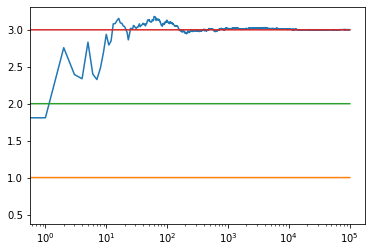

0.9976156934934437
2.510721958344879
3.0017800839574313


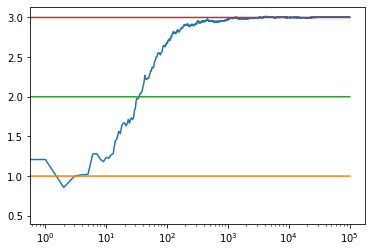

1.2970619466183928
1.7382484875011213
3.0050606150826242


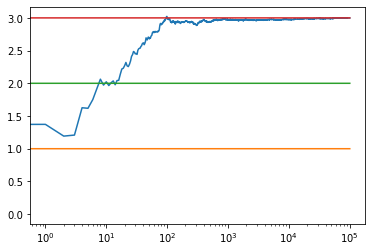

1.2084728013021195
2.070057375985287
2.998221568279578


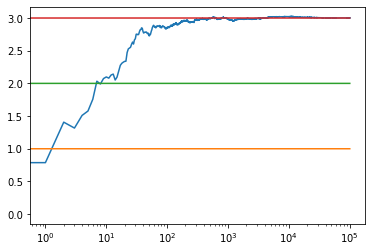

1.1970856383224404
2.1049461701458463
3.001888105014126


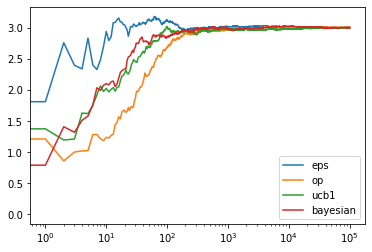

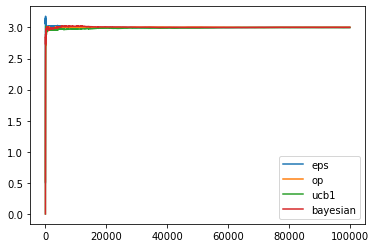

In [49]:
if __name__ == '__main__':
    c10 = run_experiment_epsilon_greedy(1.0, 2.0, 3.0, 100000)
    op = run_experiment_epsilon_greedy(1.0, 2.0, 3.0, 100000)
    ucb1 = run_experiment_ucb1(1.0, 2.0, 3.0, 0.00001, 100000)
    bayes = run_experiment_bayesian(1.0, 2.0, 3.0, 100000)
    
    #log scale plot
    plt.plot(c10, label = 'eps')
    plt.plot(op, label = 'op')
    plt.plot(ucb1, label = 'ucb1')
    plt.plot(bayes, label = 'bayesian')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    plt.plot(c10, label = 'eps')
    plt.plot(op, label = 'op')
    plt.plot(ucb1, label = 'ucb1')
    plt.plot(bayes, label = 'bayesian')
    plt.legend()
    plt.show()
    
    